In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breakhis/Folds.csv
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/README.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/count_files.sh
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/process_db_stat.py
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/fibroadenoma.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/phyllodes_tumor.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/tubular_adenoma.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/adenosis.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/README_B.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/200X/SOB_B_A-14-29960CD-200-012.png
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides

In [3]:
import shutil
import glob
import cv2
#shutil.rmtree('/kaggle/working/augmented')

In [4]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles



In [5]:
os.mkdir("/kaggle/working/augmented")

In [6]:
os.mkdir("/kaggle/working/augmented/malignant")
os.mkdir("/kaggle/working/augmented/benign")

In [7]:
def processing2(img_path):
    img = cv2.imread(img_path)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    image = cv2.medianBlur(image, 5)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image[:, :, 2] = cv2.equalizeHist(image[:, :, 2])
    image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    cv2.imwrite(img_path,image)

In [8]:
files_benign=getListOfFiles('../input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign')
for f in files_benign:
    if f.endswith('.png'):
        shutil.copy(f,'augmented/benign')

In [9]:
files_malignant=getListOfFiles('../input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant')
i=0
for f in files_malignant:
    if i< len(files_benign) and f.endswith('.png'):
        shutil.copy(f,'augmented/malignant')
        i=i+1

In [10]:
pwd

'/kaggle/working'

In [11]:
onlyfiles = next(os.walk('augmented/benign'))[2] 
benign=len(onlyfiles)
onlyfiles = next(os.walk('augmented/malignant'))[2] 
malignant=len(onlyfiles)
print('Total no of files in both benign and malignant is :',malignant,benign,malignant+benign)

Total no of files in both benign and malignant is : 2486 2480 4966


In [12]:
benign=getListOfFiles('/kaggle/working/augmented/benign')
print(benign)
for f in benign:
    processing2(f)

['/kaggle/working/augmented/benign/SOB_B_F-14-14134-40-014.png', '/kaggle/working/augmented/benign/SOB_B_A-14-22549AB-100-001.png', '/kaggle/working/augmented/benign/SOB_B_F-14-14134E-400-010.png', '/kaggle/working/augmented/benign/SOB_B_F-14-14134-200-018.png', '/kaggle/working/augmented/benign/SOB_B_PT-14-21998AB-40-014.png', '/kaggle/working/augmented/benign/SOB_B_A-14-22549AB-200-015.png', '/kaggle/working/augmented/benign/SOB_B_F-14-21998EF-100-026.png', '/kaggle/working/augmented/benign/SOB_B_F-14-14134-40-005.png', '/kaggle/working/augmented/benign/SOB_B_TA-14-16184-100-013.png', '/kaggle/working/augmented/benign/SOB_B_F-14-9133-200-024.png', '/kaggle/working/augmented/benign/SOB_B_F-14-9133-200-034.png', '/kaggle/working/augmented/benign/SOB_B_TA-14-19854C-200-003.png', '/kaggle/working/augmented/benign/SOB_B_F-14-21998EF-400-002.png', '/kaggle/working/augmented/benign/SOB_B_PT-14-22704-40-015.png', '/kaggle/working/augmented/benign/SOB_B_A-14-22549G-200-022.png', '/kaggle/work

In [13]:
malignant=getListOfFiles('/kaggle/working/augmented/malignant')
for f in malignant:
    f = processing2(f)

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [15]:
ig=ImageDataGenerator(validation_split=0.2)

In [16]:
path='augmented'

In [49]:
train_batches = ig.flow_from_directory(directory=path,
                                       target_size=(224,224),
                                       classes=['benign', 'malignant'],
                                       batch_size=64,
                                       shuffle=True,
                                       subset='training')
valid_batches = ig.flow_from_directory(directory=path,
                                       target_size=(224,224),
                                       classes=['benign', 'malignant'],
                                       subset='validation')

Found 3973 images belonging to 2 classes.
Found 993 images belonging to 2 classes.


In [18]:
type(train_batches)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [19]:
imgs, labels = next(train_batches)
valid_batches

In [20]:
type(labels),type(imgs)

(numpy.ndarray, numpy.ndarray)

In [21]:
imgs.shape,labels.shape

((64, 224, 224, 3), (64, 2))

In [22]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
import math, json, os, sys

import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image


from tensorflow.keras.applications import ResNet50
from keras import layers


In [23]:
def train_and_evaluate(model,output_name):
    classes=2
    model1 = Sequential()
    model1.add(model)
    #model1.add(Dropout(0.1))
    #model1.add(BatchNormalization())
    #model1.add(Dense(2048, activation='swish'))
    #model1.add(BatchNormalization())
    #model1.add(Dense(1024, activation='swish'))
    #model1.add(BatchNormalization())
    #model1.add(Dense(classes, activation='softmax'))
    model1.add(layers.GlobalAveragePooling2D())
    model1.add(layers.Dropout(0.5))
    model1.add(layers.BatchNormalization())
    model1.add(layers.Dense(2, activation='softmax'))
    model1.summary()
               
    #model1.layers[0].trainable = True
    
               
    model1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy', METRICS])
    
    early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.001)
    
    checkpointer = ModelCheckpoint('/kaggle/working/'+get_model_name(output_name+"_best_model"), 
                                monitor='val_accuracy', verbose=1, 
                                save_best_only=True, mode='m4/1AfDhmrj7JgD2OxLL3WNit6xelkbJ3xrSzTQ4MT_7IiiJRgANLGcBxVZedgUax')
    callbacks_list = [checkpointer,early_stopping]
    print("[INFO] training network...")
    H = model1.fit(x=train_batches,
        steps_per_epoch=len(train_batches),             
        validation_data=valid_batches,
        validation_steps=len(valid_batches),
        epochs=30, callbacks=callbacks_list,batch_size=64)
    model1.save('/kaggle/working/'+output_name+'_epoch25_model.h5')#17_3_21_VGG16_epoch50_model.h5')
    # summarize history for accuracy
    plt.plot(H.history['accuracy'])
    plt.plot(H.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/kaggle/working/'+output_name+'_acc_vs_epoch.jpg')
    plt.show()
    # summarize history for loss
    plt.plot(H.history['loss'])
    plt.plot(H.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/kaggle/working/'+output_name+'_loss_vs_epoch.jpg')
    plt.show()

In [24]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.AUC(name='auc')
]

In [25]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [26]:
from keras import models

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,717,762
Trainable params: 14,716,738
Non-trainable params: 1,024
_________________________________________________________________
[INFO] training network...
Epoch 1/30
63/

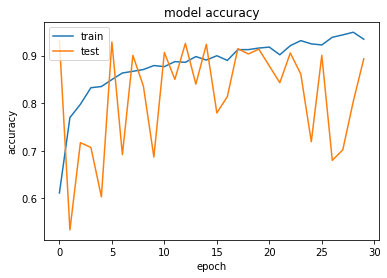

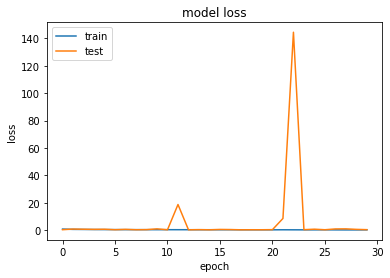

In [27]:
model = keras.applications.VGG16(weights='imagenet',
    include_top=False)#(weights='imagenet')
train_and_evaluate(model,'17_3_2021_VGG16')

17227776/17225924 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 3,235,010
Trainable params: 3,211,074
Non-trainable params: 23,936
_________________________________________________________________
[INFO] training network...
Epoch 1/30
63

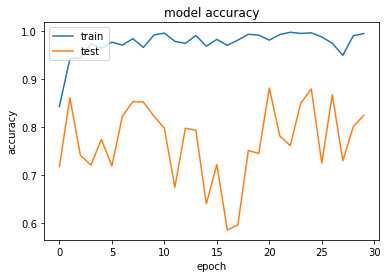

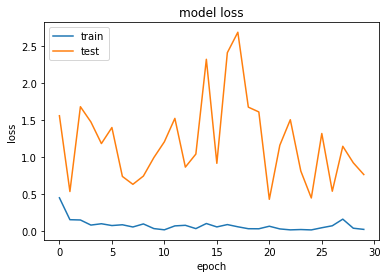

In [28]:
model = keras.applications.MobileNet(weights='imagenet', include_top=False,input_shape=(224,224, 3)) 
train_and_evaluate(model,'17_3_2021_MobileNet')

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,600,002
Trainable params: 23,542,786
Non-trainable params: 57,216
_________________________________________________________________
[INFO] training network...
Epoch 1/30


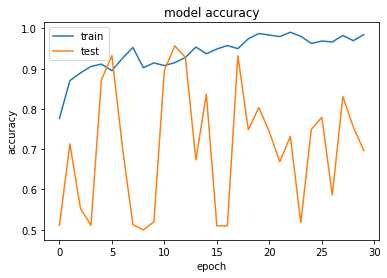

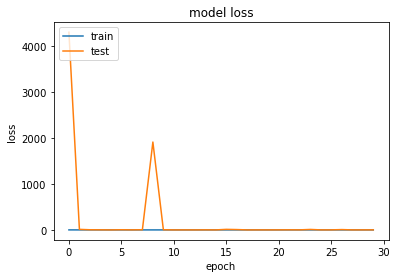

In [29]:
model= ResNet50(weights='imagenet', include_top=False,input_shape=(224,224, 3)) 
train_and_evaluate(model,'17_3_2021_ResNet50')

219062272/219055592 [==============================] - 2s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1536)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1536)              0         
_________________________________________________________________
batch_normalization_206 (Bat (None, 1536)              6144      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 3074      
Total params: 54,345,954
Trainable params: 54,282,338
Non-trainable params: 63,616
_________________________________________________________________
[INFO] training network...
Epoch 1/3

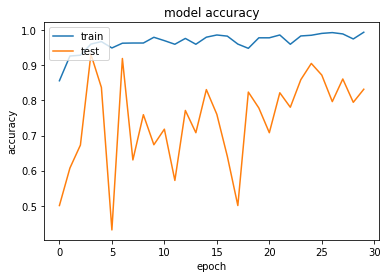

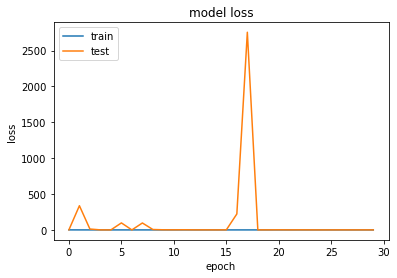

In [30]:
model= keras.applications.InceptionResNetV2(weights='imagenet', include_top=False,input_shape=(224,224, 3)) 
train_and_evaluate(model,'17_3_2021_IncepResNet')

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_301 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4098      
Total params: 21,815,074
Trainable params: 21,776,546
Non-trainable params: 38,528
_________________________________________________________________
[INFO] training network...
Epoch 1/30


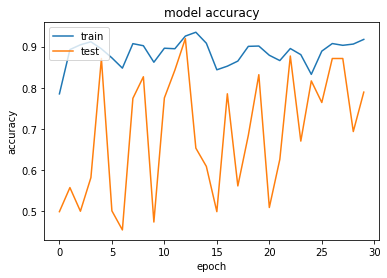

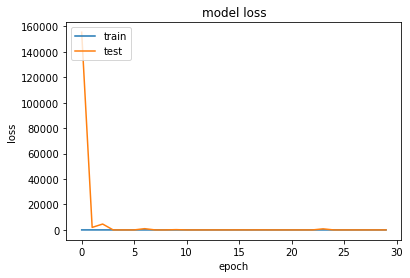

In [31]:
model= keras.applications.InceptionV3(weights='imagenet', include_top=False,input_shape=(224,224, 3)) 
train_and_evaluate(model,'17_3_2021_Inception')

234553344/234545216 [==============================] - 2s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, None, None, 2048)  58331648  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_302 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 4098      
Total params: 58,343,938
Trainable params: 58,196,098
Non-trainable params: 147,840
_________________________________________________________________
[INFO] training network...
Epoch 1/

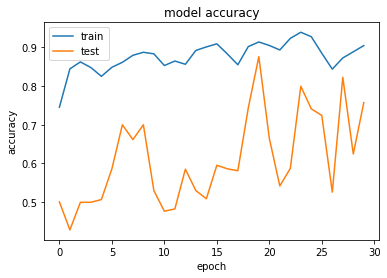

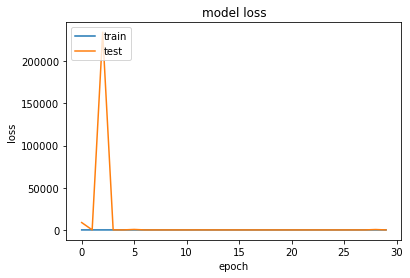

In [32]:
model = keras.applications.ResNet152V2(weights='imagenet',include_top=False)
train_and_evaluate(model,'17_3_2021_Resnet150')

In [33]:
# import the necessary packages
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from tensorflow.keras.preprocessing.image import img_to_array

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 12, 12, 256)       1192096   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_307 (Bat (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 1,193,634
Trainable params: 1,192,162
Non-trainable params: 1,472
_________________________________________________________________
[INFO] training network...
Epoch 1/30
63/63 [==============================] - 28s 382ms/step - loss: 0.74

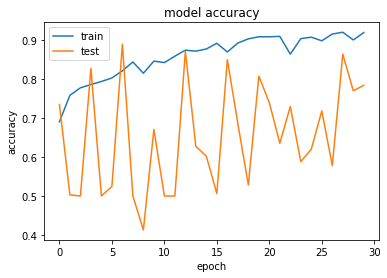

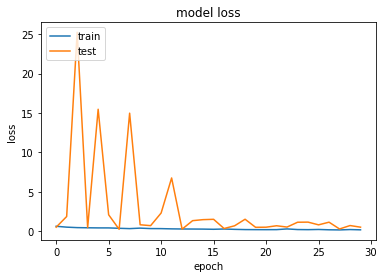

In [34]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(224, 224, 3), activation="swish"))
model.add(Conv2D(32, (5, 5), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(64, (3, 3), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(128, (3, 3), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(256, (3, 3), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

train_and_evaluate(model,'17_3_2021_My_CNN_model')

In [43]:
model1 = keras.models.load_model('/kaggle/working/17_3_2021_My_CNN_model_epoch25_model.h5')
model2 = keras.models.load_model('/kaggle/working/17_3_2021_Resnet150_epoch25_model.h5')
model3 = keras.models.load_model('/kaggle/working/17_3_2021_ResNet50_epoch25_model.h5')
model4 = keras.models.load_model('/kaggle/working/17_3_2021_VGG16_epoch25_model.h5')

In [53]:
img_v, labels_v = next(valid_batches)
val_gen1=valid_batches

In [54]:
len(labels_v)

32

In [50]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# make a prediction
y_pred_keras1 = model1.predict_generator(val_gen1)
y_pred_keras2 = model2.predict_generator(val_gen1)
y_pred_keras3 = model3.predict_generator(val_gen1)
y_pred_keras4 = model4.predict_generator(val_gen1)


In [69]:
def parallel_fusion(x1,x2,x3,x4):
    y_pred=[]
    count=0
    c=0
    for i in range(len(y_pred_keras1)):
      y_p1=(x1*y_pred_keras1[i][0]+x2*y_pred_keras2[i][0]+x3*y_pred_keras3[i][0]+x4*y_pred_keras4[i][0])/(x1+x2+x3+x4) #
      y_p2=(x1*y_pred_keras1[i][1]+x2*y_pred_keras2[i][1]+x3*y_pred_keras3[i][1]+x4*y_pred_keras4[i][1])/(x1+x2+x3+x4)#
      if y_p1>=y_p2:
        y_pred.append(0)
        count=count+1
      else:
        y_pred.append(1)
        c=c+1
    return(count,c,x1,x2,x3,x4,496,497)

In [70]:
len(y_pred_keras1)

993

In [99]:
a=[]
a.append(parallel_fusion(0.5,0.5,0,0))
a.append(parallel_fusion(0.6,0.4,0,0))
a.append(parallel_fusion(0.4,0.6,0,0))
a.append(parallel_fusion(0.7,0.3,0,0))
a.append(parallel_fusion(0.3,0.7,0,0))
a.append(parallel_fusion(0.8,0.2,0,0))
a.append(parallel_fusion(0.2,0.8,0,0))
a.append(parallel_fusion(0.9,0.1,0,0))
a.append(parallel_fusion(0.1,0.9,0,0))

a.append(parallel_fusion(0.5,0,0,0.5))
a.append(parallel_fusion(0.6,0,0,0.4))
a.append(parallel_fusion(0.4,0,0,0.6))
a.append(parallel_fusion(0.7,0,0,0.3))
a.append(parallel_fusion(0.3,0,0,0.7))
a.append(parallel_fusion(0.8,0,0,0.2))
a.append(parallel_fusion(0.2,0,0,0.8))
a.append(parallel_fusion(0.9,0,0,0.1))
a.append(parallel_fusion(0.1,0,0,0.9))

a.append(parallel_fusion(0.5,0.5,0.5,0.5))
a.append(parallel_fusion(0.4,0.6,0.6,0.4))
a.append(parallel_fusion(0.4,0.6,0.4,0.6))
a.append(parallel_fusion(0.4,0.4,0.6,0.6))
a.append(parallel_fusion(0.6,0.6,0.4,0.4))
a.append(parallel_fusion(0.6,0.4,0.6,0.4))
a.append(parallel_fusion(0.6,0.4,0.4,0.6))

a.append(parallel_fusion(0.3,0.7,0.6,0.4))
a.append(parallel_fusion(0.3,0.7,0.7,0.3))
a.append(parallel_fusion(0.3,0.7,0.3,0.7))
a.append(parallel_fusion(0.7,0.3,0.4,0.6))
a.append(parallel_fusion(0.7,0.7,0.3,0.3))
a.append(parallel_fusion(0.6,0.7,0.4,0.3))
a.append(parallel_fusion(0.7,0.4,0.7,0.3))

a.append(parallel_fusion(0.3,0.3,0.3,1.1))
a.append(parallel_fusion(0.4,0.3,0.3,1))
a.append(parallel_fusion(0.4,0.4,0.3,0.9))
a.append(parallel_fusion(0.5,0.4,0.3,0.8))
a.append(parallel_fusion(0.5,0.5,0.3,0.7))


In [100]:
#496 497
accuracy=[]
for i in range(len(a)):
    l=((min(a[i][0],a[i][6])+min(a[i][1],a[i][7]))/(a[i][6]+a[i][7]))
    accuracy.append(l)
    

In [101]:

for i in range(len(a)):
    print(a[i][2],"&",a[i][3],"&",a[i][4],"&",a[i][5],"&",accuracy[i],"\\\\")#,"&",a[i][0],"&",a[i][1])


0.5 & 0.5 & 0 & 0 & 0.9566968781470292 \\
0.6 & 0.4 & 0 & 0 & 0.9164149043303121 \\
0.4 & 0.6 & 0 & 0 & 0.9244712990936556 \\
0.7 & 0.3 & 0 & 0 & 0.9234642497482377 \\
0.3 & 0.7 & 0 & 0 & 0.9133937562940584 \\
0.8 & 0.2 & 0 & 0 & 0.9244712990936556 \\
0.2 & 0.8 & 0 & 0 & 0.9113796576032226 \\
0.9 & 0.1 & 0 & 0 & 0.9234642497482377 \\
0.1 & 0.9 & 0 & 0 & 0.9113796576032226 \\
0.5 & 0 & 0 & 0.5 & 0.9355488418932527 \\
0.6 & 0 & 0 & 0.4 & 0.945619335347432 \\
0.4 & 0 & 0 & 0.6 & 0.972809667673716 \\
0.7 & 0 & 0 & 0.3 & 0.9365558912386707 \\
0.3 & 0 & 0 & 0.7 & 0.9778449144008057 \\
0.8 & 0 & 0 & 0.2 & 0.9305135951661632 \\
0.2 & 0 & 0 & 0.8 & 0.9788519637462235 \\
0.9 & 0 & 0 & 0.1 & 0.9264853977844915 \\
0.1 & 0 & 0 & 0.9 & 0.9768378650553877 \\
0.5 & 0.5 & 0.5 & 0.5 & 0.8680765357502518 \\
0.4 & 0.6 & 0.6 & 0.4 & 0.8429003021148036 \\
0.4 & 0.6 & 0.4 & 0.6 & 0.8841893252769386 \\
0.4 & 0.4 & 0.6 & 0.6 & 0.8499496475327291 \\
0.6 & 0.6 & 0.4 & 0.4 & 0.877139979859013 \\
0.6 & 0.4 & 0.6 &